## Step 1: Install OpenCV

In [ ]:
!pip install opencv-python-headless

## Step 2: Import Necessary Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Function to display an image using matplotlib
def display_image(img, title="Image"):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis('off')
  plt.show()

# Function to display two images side by side
def display_images(img1, img2, title1="Image 1", title2="Image 2"):
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  plt.title(title1)
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
  plt.title(title2)
  plt.axis('off')
  plt.show()

cv2: This imports OpenCV, which provides functions for image processing.
numpy (np): This library is used for handling arrays and matrices, which images are represented as. matplotlib.pyplot (plt): This is used to display images in a Jupyter notebook or Google Colab environment.

## Step 3: Load an Image

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image
# Upload an image
uploaded = files.upload()
# Convert to OpenCV format
image_path = next(iter(uploaded)) # Get the image file name
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

Saving piksurkopogi.jpeg to piksurkopogi (4).jpeg


display_image(): Converts the image from BGR (OpenCV's default color format) to RGB (the format expected by matplotlib) and displays it using imshow().
display_images(): This function allows two images to be displayed side by side for comparison. We use subplot to create a grid of plots (here, 1 row and 2 columns).

## Scaling and Rotation

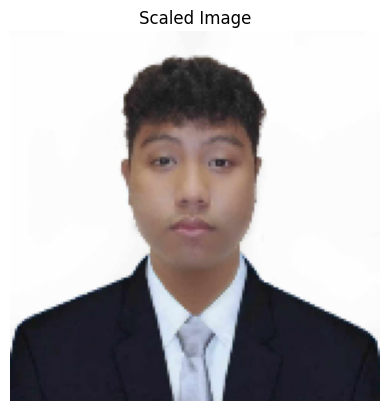

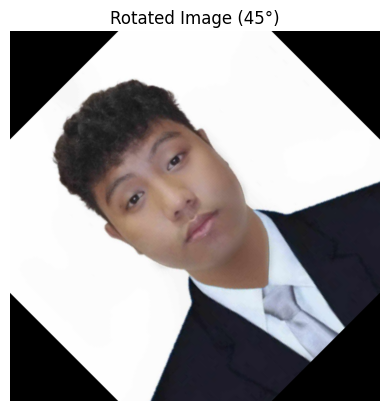

'\nThese lines apply the scaling and rotation functions to the uploaded image and display the results. '

In [ ]:
# Scaling
def scale_image(img, scale_factor):
  height, width = img.shape[:2]
  scaled_img = cv2.resize(img,
  (int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)

  return scaled_img
"""
scale_image(): This function scales the image by a given factor.
The cv2.resize() function takes the original dimensions of the image, multiplies them by the scale_factor, and resizes the image accordingly. INTER_LINEAR is a common interpolation method for resizing.
"""
# Rotate
def rotate_image(img, angle):
  height, width = img.shape[:2]
  center = (width // 2, height // 2)
  matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated_img = cv2.warpAffine(img, matrix, (width, height))
  return rotated_img

scaled_image = scale_image(image, 0.1)
display_image(scaled_image, "Scaled Image")

rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image (45°)")


## Blurring Techniques

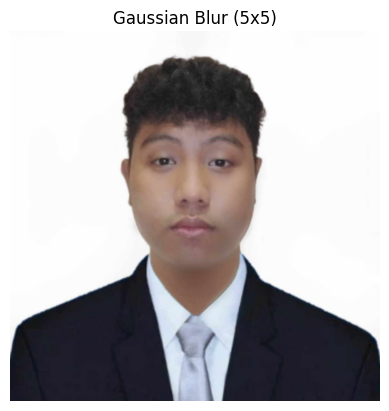

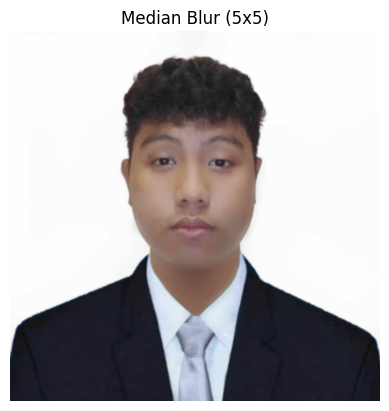

"\ncv2.medianBlur(): Applies a median blur, which replaces each pixel's value with the median value of its neighbors in a 5x5 kernel. This method is particularly effective in removing salt-and-pepper noise.\n"

In [ ]:
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
display_image(gaussian_blur, "Gaussian Blur (5x5)")
"""
cv2.GaussianBlur(): Applies a Gaussian blur to the image, which smooths it by averaging
the pixel values in a 5x5 kernel (a small matrix). This is useful for reducing noise in an image. """
# Median Blur
median_blur = cv2.medianBlur(image, 5)
display_image(median_blur, "Median Blur (5x5)")
"""
cv2.medianBlur(): Applies a median blur, which replaces each pixel's value with the median value of its neighbors in a 5x5 kernel. This method is particularly effective in removing salt-and-pepper noise.
"""

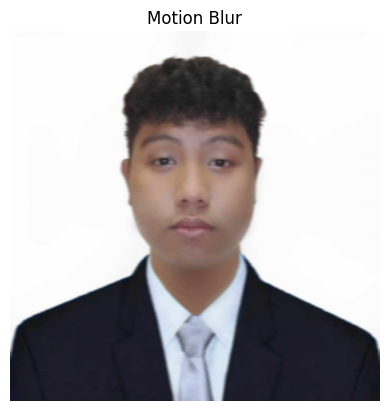

In [ ]:
# Motion Blur
def motion_blur(img):
  kernel_size = 15
  kernel = np.zeros((kernel_size, kernel_size))
  kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
  kernel = kernel / kernel_size
  motion_blurred = cv2.filter2D(img, -1, kernel)
  return motion_blurred
motion_blurred = motion_blur(image)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')
plt.show()

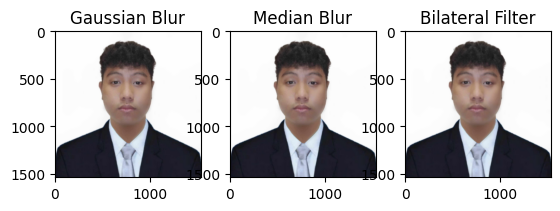

In [ ]:
# Applying Gaussian, Median, and Bilateral filters gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0) median_blur = cv2.medianBlur(image, 5)
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)
"""
cv2.bilateralFilter(): This filter smooths the image while keeping edges sharp, unlike Gaussian or median filters. It’s useful for reducing noise while preserving details. """
# Display the results for comparison plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.show()

## Edge Detection Techniques

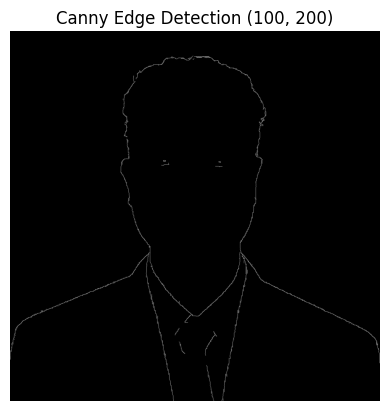

"\ncv2.Canny(): Detects edges in the image by calculating the gradient (rate of intensity change) between pixels. The two threshold values (100 and 200) define the edges'\nsensitivity. Lower thresholds detect more edges, while higher thresholds detect only the\nmost prominent edges.\n"

In [ ]:
# Canny Edge Detection
edges = cv2.Canny(image, 100, 200)
display_image(edges, "Canny Edge Detection (100, 200)")


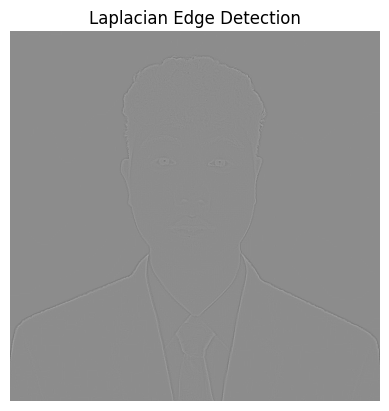

In [ ]:
# Laplacian Edge Detection
def laplacian_edge_detection(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  laplacian = cv2.Laplacian(gray, cv2.CV_64F)
  return laplacian
laplacian_edges = laplacian_edge_detection(image)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()

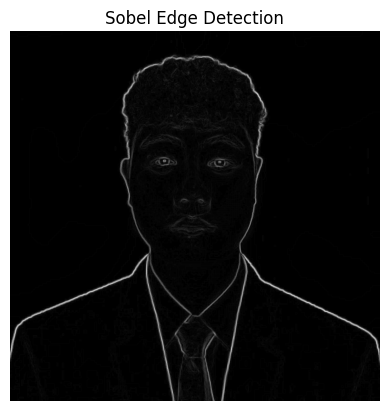

In [ ]:
# Sobel Edge Detection
def sobel_edge_detection(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Sobel edge detection in the x direction
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)

    # Sobel edge detection in the y direction
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

    # Combine the two gradients
    sobel_combined = cv2.magnitude(sobelx, sobely)

    return sobel_combined

# Apply Sobel edge detection to the uploaded image
sobel_edges = sobel_edge_detection(image)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()


Prewitt Edge Detection

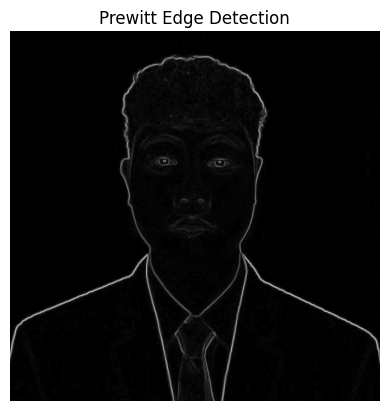

In [ ]:
# Prewitt Edge Detection
def prewitt_edge_detection(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Prewitt operator kernels for x and y directions
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)

    # Applying the Prewitt operator
    prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
    prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)

    # Combine the x and y gradients by converting to floating point
    prewitt_combined = cv2.magnitude(prewittx, prewitty)

    return prewitt_combined

# Apply Prewitt edge detection to the uploaded image
prewitt_edges = prewitt_edge_detection(image)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()